In [20]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

#클러스터링 위한 패키지
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #미리 스케일링 선언함
 
#엘보우 메소드 정의
def visualize_elbowmethod(data, param_init='random', param_n_init=10, param_max_iter=300):
    distortions = []
    for i in range(1, 10):
        km = KMeans(n_clusters=i, init=param_init, n_init=param_n_init, max_iter=param_max_iter, random_state=0)
        km.fit(data)
        distortions.append(km.inertia_)

    plt.plot(range(1, 10), distortions, marker='o')
    plt.xlabel('Number of Cluster')
    plt.ylabel('Distortion')
    plt.show()

#실루엣 스코어 정의
def visualize_silhouette_layer(data, param_init='random', param_n_init=10, param_max_iter=300):
    clusters_range = range(2,10)
    results = []

    for i in clusters_range:
        clusterer = KMeans(n_clusters=i, init=param_init, n_init=param_n_init, max_iter=param_max_iter, random_state=0)
        cluster_labels = clusterer.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm._rocket_lut)
    plt.tight_layout()
    plt.show()

In [21]:
busan_data = pd.read_csv('./data/busan_data81.csv',encoding='cp949')
busan_data

,행정동명,인구밀도,시설물개수,자동차등록대수,강,하천,자전거도로,지하철승하차합계,학교개수,영화관개수,대학교개수
0,거제1동,31691.011240,12.0,8453.769231,NaN,NaN,1.780000,1093253,5.0,NaN,1.0
1,거제2동,6898.360656,11.0,8453.769231,NaN,NaN,1.780000,297383,2.0,1.0,NaN
2,연산3동,18322.033900,NaN,8453.769231,NaN,NaN,1.780000,250423,4.0,NaN,NaN
3,연산5동,32082.692310,13.0,8453.769231,NaN,NaN,1.780000,2260041,1.0,NaN,NaN
4,연산6동,13609.322030,3.0,8453.769231,NaN,NaN,1.780000,206875,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
75,좌2동,21574.305560,20.0,10137.444440,NaN,NaN,3.586667,791741,8.0,NaN,NaN
76,반여1동,6680.501931,22.0,10137.444440,NaN,수영강,3.586667,10196,8.0,NaN,NaN
77,반송1동,1930.473373,18.0,10137.444440,NaN,NaN,3.586667,279935,3.0,NaN,1.0
78,반송2동,4811.764706,4.0,10137.444440,NaN,NaN,3.586667,137265,4.0,NaN,NaN


In [22]:
dong = busan_data.iloc[:,[0]] #cluster labeling 후 행정동 붙여서 비교하기 위해 dong으로 빼둠
#clustering 시 필요없는 변수 삭제
busan_data = busan_data.drop('행정동명', axis = 1)

In [23]:
#문자 타입 숫자로 변환
busan_data = pd.get_dummies(busan_data, columns = ['강']) 

#문자 타입 숫자로 변환(하천 존재할 시 1, 존재하지 않을 시 0)
busan_data['하천'] = busan_data['하천'].fillna(0).map(lambda x: 1 if x != 0 else x)
busan_data = busan_data.fillna(0)

In [24]:
busan_data.head(10) #데이터 형태 확인

,인구밀도,시설물개수,자동차등록대수,하천,자전거도로,지하철승하차합계,학교개수,영화관개수,대학교개수,강_낙동강
0,31691.011240,12.0,8453.769231,0,1.780,1093253,5.0,0.0,1.0,0
1,6898.360656,11.0,8453.769231,0,1.780,297383,2.0,1.0,0.0,0
2,18322.033900,0.0,8453.769231,0,1.780,250423,4.0,0.0,0.0,0
3,32082.692310,13.0,8453.769231,0,1.780,2260041,1.0,0.0,0.0,0
4,13609.322030,3.0,8453.769231,0,1.780,206875,3.0,0.0,0.0,0
5,16950.458720,9.0,7146.625000,0,3.285,500648,0.0,0.0,0.0,0
6,14850.485440,2.0,7146.625000,0,3.285,228583,2.0,0.0,0.0,0
7,17156.321840,5.0,7146.625000,0,3.285,224985,2.0,0.0,0.0,0
8,6389.922481,21.0,7146.625000,0,3.285,360736,7.0,0.0,0.0,0
9,3318.307692,12.0,7146.625000,0,3.285,1035820,0.0,0.0,0.0,0


In [25]:
array_busan_data = busan_data.to_numpy() #array꼴로 바꿈
data_scaled = scaler.fit_transform(array_busan_data) #스케일링

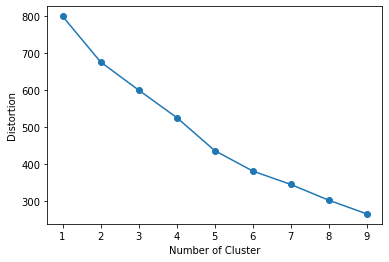

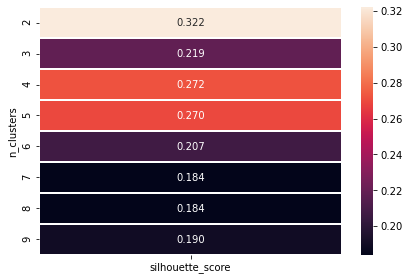

In [26]:
visualize_elbowmethod(data_scaled)
visualize_silhouette_layer(data_scaled)

In [27]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data_scaled)

KMeans(n_clusters=5)

In [28]:
print(scaler.inverse_transform(kmeans.cluster_centers_))

[[ 1.35159908e+04  5.98000000e+00  6.93512799e+03 -2.77555756e-17
   1.68014928e+00  6.10661640e+05  2.30000000e+00  1.00000000e-01
   2.77555756e-17 -6.93889390e-17]
 [ 1.05943127e+04  1.70588235e+01  8.28793951e+03  1.76470588e-01
   2.48832994e+00  4.06325471e+05  5.00000000e+00  1.76470588e-01
   4.16333634e-17  4.11764706e-01]
 [ 1.26687211e+04  1.31000000e+01  7.15986567e+03 -1.38777878e-17
   1.79558250e+00  6.39474000e+05  3.40000000e+00  3.00000000e-01
   1.00000000e+00  0.00000000e+00]
 [ 9.39408100e+03  4.80000000e+01  1.01374444e+04  1.00000000e+00
   3.58666667e+00  1.55747000e+06  8.00000000e+00  7.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 2.57845763e+02  8.50000000e+00  1.41034500e+04  5.00000000e-01
   1.28026250e+01  3.77788000e+05  3.00000000e+00 -2.77555756e-17
   0.00000000e+00  5.00000000e-01]]


In [29]:
assignments_busan_scaled = kmeans.labels_
print(assignments_busan_scaled)

[2 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 2 1 0 0 1 0 0 1 1
 2 0 0 0 0 0 0 0 0 0 0 1 0 2 0 2 0 0 0 0 0 4 2 0 0 0 0 2 0 0 1 0 2 2 0 1 3
 1 1 1 2 0 4]


In [15]:
busan_data["cluster"]=assignments_busan_scaled
busan_data["행정동명"]= dong

In [16]:
busan_data

,인구밀도,시설물개수,자동차등록대수,하천,자전거도로,지하철승하차합계,학교개수,영화관개수,대학교개수,강_낙동강,cluster,행정동명
0,31691.011240,12.0,8453.769231,0,1.780000,1093253,5.0,0.0,1.0,0,2,거제1동
1,6898.360656,11.0,8453.769231,0,1.780000,297383,2.0,1.0,0.0,0,0,거제2동
2,18322.033900,0.0,8453.769231,0,1.780000,250423,4.0,0.0,0.0,0,0,연산3동
3,32082.692310,13.0,8453.769231,0,1.780000,2260041,1.0,0.0,0.0,0,2,연산5동
4,13609.322030,3.0,8453.769231,0,1.780000,206875,3.0,0.0,0.0,0,0,연산6동
...,...,...,...,...,...,...,...,...,...,...,...,...
75,21574.305560,20.0,10137.444440,0,3.586667,791741,8.0,0.0,0.0,0,0,좌2동
76,6680.501931,22.0,10137.444440,1,3.586667,10196,8.0,0.0,0.0,0,3,반여1동
77,1930.473373,18.0,10137.444440,0,3.586667,279935,3.0,0.0,1.0,0,2,반송1동
78,4811.764706,4.0,10137.444440,0,3.586667,137265,4.0,0.0,0.0,0,0,반송2동


In [17]:
busan_data.to_csv('./cluster_result/busan_cluster80_1.csv',index=False)

## 종로1.2.3.4가동 이상치 제거

In [19]:
org_seoul_data = pd.read_csv('./data/seoul_data100.csv',encoding='UTF8')
seoul_data['행정동명'] = org_seoul_data['행정동명']
seoul_data

,시설물개수,인구밀도 (명/㎢),하천,자동차등록대수,자전거도로(km),지하철_총승객수,버스_총승객수,학교개수,영화관개수,대학교개수,강_한강,cluster,행정동명
0,20,7310,0,9477.400000,3.855000,522372.0,711582,2.0,1.0,0.0,0,0,가양1동
1,20,3919,0,7557.388889,3.511111,7984912.0,2788411,5.0,1.0,0.0,1,2,여의동
2,32,12325,0,9477.400000,3.855000,1919704.0,744341,17.0,0.0,0.0,0,4,발산1동
3,8,23937,0,7557.388889,3.511111,4249030.0,1017536,7.0,0.0,0.0,1,5,당산2동
4,29,3702,0,2607.352941,1.888235,11550312.0,3700523,2.0,4.0,5.0,0,3,종로1.2.3.4가동
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,11,17639,0,7102.937500,4.212500,607635.0,368024,0.0,0.0,1.0,1,5,서강동
96,8,23849,1,7102.937500,4.212500,0.0,439357,2.0,0.0,0.0,0,6,성산1동
97,20,9030,0,3542.800000,1.493333,1755720.0,705689,1.0,2.0,1.0,0,1,광희동
98,12,20606,0,7938.562500,2.793750,1036300.0,872203,2.0,0.0,0.0,0,0,녹번동


In [20]:
seoul_data = seoul_data[seoul_data.cluster != 3] #이상치 제거
dong = seoul_data.iloc[:,[12]] #동열만 추출
dong

,행정동명
0,가양1동
1,여의동
2,발산1동
3,당산2동
5,상암동
...,...
95,서강동
96,성산1동
97,광희동
98,녹번동


In [21]:
seoul_data = seoul_data.drop('cluster', axis = 1)
seoul_data = seoul_data.drop('행정동명', axis = 1)

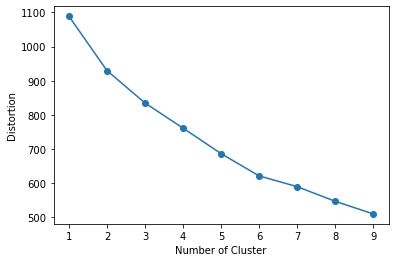

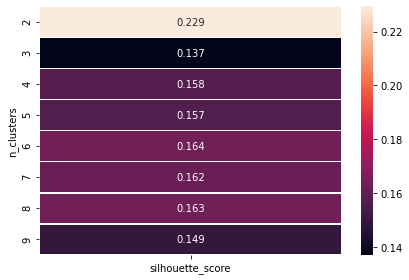

In [25]:
array_seoul_data = seoul_data.to_numpy() #array꼴로 바꿈
data_scaled = scaler.fit_transform(array_seoul_data)
visualize_elbowmethod(data_scaled)
visualize_silhouette_layer(data_scaled)

In [26]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(data_scaled)
assignments_seoul_scaled = kmeans.labels_
print(assignments_seoul_scaled)

[2 1 2 0 1 2 5 0 4 2 2 1 3 4 5 3 2 4 1 4 1 3 1 4 3 4 2 0 3 0 1 2 3 4 0 0 1
 4 0 4 4 3 2 2 3 0 3 2 4 5 2 4 3 3 5 0 0 3 3 0 0 2 4 4 3 5 3 3 2 2 2 5 3 3
 5 3 3 4 2 3 3 3 3 3 3 4 0 0 2 3 5 4 4 4 0 4 5 3 3]


In [27]:
seoul_data["cluster"]=assignments_seoul_scaled
seoul_data["행정동명"]= dong

In [28]:
seoul_data

,시설물개수,인구밀도 (명/㎢),하천,자동차등록대수,자전거도로(km),지하철_총승객수,버스_총승객수,학교개수,영화관개수,대학교개수,강_한강,cluster,행정동명
0,20,7310,0,9477.400000,3.855000,522372.0,711582,2.0,1.0,0.0,0,2,가양1동
1,20,3919,0,7557.388889,3.511111,7984912.0,2788411,5.0,1.0,0.0,1,1,여의동
2,32,12325,0,9477.400000,3.855000,1919704.0,744341,17.0,0.0,0.0,0,2,발산1동
3,8,23937,0,7557.388889,3.511111,4249030.0,1017536,7.0,0.0,0.0,1,0,당산2동
5,19,3671,0,7102.937500,4.212500,4981827.0,1616294,2.0,1.0,0.0,1,1,상암동
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,11,17639,0,7102.937500,4.212500,607635.0,368024,0.0,0.0,1.0,1,0,서강동
96,8,23849,1,7102.937500,4.212500,0.0,439357,2.0,0.0,0.0,0,4,성산1동
97,20,9030,0,3542.800000,1.493333,1755720.0,705689,1.0,2.0,1.0,0,5,광희동
98,12,20606,0,7938.562500,2.793750,1036300.0,872203,2.0,0.0,0.0,0,3,녹번동


In [29]:
seoul_data.to_csv('./cluster_result/seoul_cluster100_5.csv',index=False)